<a href="https://colab.research.google.com/github/Milind1505/Respiration-Rate-Estimation-from-Audio-using-Deep-Learning/blob/main/Respiration_Rate_Estimation_from_Audio_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Respiration Rate Estimation from Audio using Deep Learning

## Introduction

This project explores the development of a machine learning prototype for estimating respiration rate (breaths per minute) directly from audio recordings of breathing. Respiration rate is a vital physiological parameter, and its non-contact estimation from audio offers a convenient and potentially valuable monitoring tool in various applications, from healthcare to fitness. This prototype utilizes synthetic breathing sounds to train and evaluate a deep learning model, specifically a 1D Convolutional Neural Network (CNN), to identify patterns in audio waveforms that correlate with respiration rate. The goal is to demonstrate the feasibility of this approach and lay the groundwork for future work with real-world audio datasets and potential deployment scenarios.

## Data simulation/loading

### Subtask:
Generate synthetic breathing sounds or load a publicly available dataset.


**Reasoning**:
I will generate synthetic breathing sounds as it provides more control over the data characteristics and avoids the complexities of downloading and loading external datasets within this environment. I will define parameters for the simulation and generate the synthetic audio data and corresponding ground truth respiration rates.



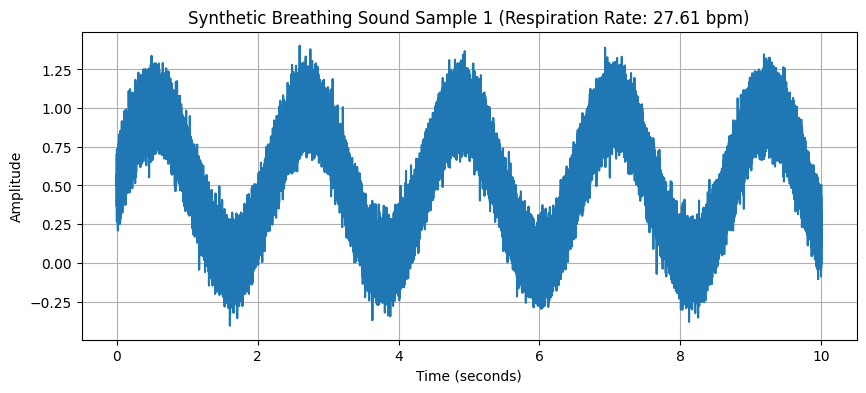

Generated 100 synthetic audio samples.
Corresponding respiration rates (first 5): [27.611483626658313, 13.476358694956525, 26.2319952739198, 24.77842848898092, 18.24326143421903]


In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Define simulation parameters
sampling_rate = 16000  # Sampling rate in Hz
duration = 10  # Duration of each recording in seconds
min_respiration_rate = 10  # Minimum respiration rate in breaths per minute
max_respiration_rate = 30  # Maximum respiration rate in breaths per minute
num_samples = 100  # Number of synthetic samples to generate

# Generate synthetic breathing sounds and respiration rates
audio_data = []
respiration_rates = []

for _ in range(num_samples):
    # Generate a random respiration rate
    respiration_rate = np.random.uniform(min_respiration_rate, max_respiration_rate)
    respiration_rates.append(respiration_rate)

    # Convert respiration rate to breaths per second
    breaths_per_second = respiration_rate / 60

    # Generate a synthetic breathing pattern (simple sine wave for demonstration)
    t = np.linspace(0, duration, int(sampling_rate * duration))
    # Simulate inhalation and exhalation as peaks and troughs
    breathing_pattern = 0.5 * (1 + np.sin(2 * np.pi * breaths_per_second * t))

    # Add some high-frequency noise to simulate breathing sound texture
    noise = np.random.randn(len(t)) * 0.1
    synthetic_audio = breathing_pattern + noise

    audio_data.append(synthetic_audio)

# Store the generated data
# audio_data is a list of numpy arrays, each representing a waveform
# respiration_rates is a list of floats, each representing the respiration rate for the corresponding audio sample

# Display the first generated waveform and its respiration rate
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, duration, len(audio_data[0])), audio_data[0])
plt.title(f"Synthetic Breathing Sound Sample 1 (Respiration Rate: {respiration_rates[0]:.2f} bpm)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

print(f"Generated {len(audio_data)} synthetic audio samples.")
print(f"Corresponding respiration rates (first 5): {respiration_rates[:5]}")

## Data preprocessing

### Subtask:
Preprocess audio data into fixed-length segments (waveforms or spectrograms) suitable for model input and corresponding ground truth respiration rates.


**Reasoning**:
Preprocess the synthetic audio data into fixed-length segments (waveforms) and prepare the corresponding respiration rates as NumPy arrays for model input.



In [2]:
# Determine the fixed length of the audio segments (already fixed at 10 seconds by generation)
segment_length_samples = int(sampling_rate * duration)

# We will use raw waveform data as input for simplicity in this prototype.

# Ensure all segments have the same length (they do based on the generation process)
# Convert the list of waveforms to a NumPy array
X = np.array(audio_data)

# Convert the list of respiration rates to a NumPy array
y = np.array(respiration_rates)

# Verify the shapes of the input and output arrays
print(f"Shape of input data (X): {X.shape}")
print(f"Shape of output data (y): {y.shape}")

# Reshape X to be suitable for a 1D CNN (samples, timesteps, features)
# In this case, timesteps is the number of samples in the segment, and features is 1
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Shape of input data (X) after reshaping for CNN: {X.shape}")

Shape of input data (X): (100, 160000)
Shape of output data (y): (100,)
Shape of input data (X) after reshaping for CNN: (100, 160000, 1)


## Model definition

### Subtask:
Design a 1D-CNN or LSTM model using TensorFlow/Keras for respiration rate estimation.


**Reasoning**:
Design a 1D-CNN model using TensorFlow/Keras for respiration rate estimation as per the instructions.



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Instantiate a Sequential model
model = Sequential()

# Add Conv1D and MaxPooling1D layers
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(segment_length_samples, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(units=100, activation='relu'))

# Output layer with one unit and linear activation for regression
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Print a summary of the model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 159996, 32)     │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 79998, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 79994, 64)      │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 39997, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 39993, 128)     │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19996, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2559488)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │   255,948,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,000,585 (976.56 MB)

 Trainable params: 256,000,585 (976.56 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

### Subtask:
Train the defined model on the prepared dataset.


**Reasoning**:
Split the data into training and testing sets and train the defined Keras model using the training data while validating on the test data.



In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 12s/step - loss: 5382.9565 - mean_absolute_error: 52.9258 - val_loss: 602.9977 - val_mean_absolute_error: 24.1975
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 707ms/step - loss: 479.7612 - mean_absolute_error: 21.0884 - val_loss: 480.4814 - val_mean_absolute_error: 21.5145
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 744ms/step - loss: 400.9728 - mean_absolute_error: 19.2373 - val_loss: 456.1238 - val_mean_absolute_error: 20.9384
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 723ms/step - loss: 397.0778 - mean_absolute_error: 19.0609 - val_loss: 420.4154 - val_mean_absolute_error: 20.0660
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 708ms/step - loss: 352.4680 - mean_absolute_error: 17.8703 - val_loss: 308.6767 - val_mean_absolute_error: 17.0475
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - loss: 224.5701 - mean_absolute_error: 13.8194 - val_loss: 100.8062 - val_mean_absolute_error: 9.0535
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - loss: 77.1388 - me

## Model evaluation

### Subtask:
Evaluate the trained model using a held-out test set, comparing predicted respiration rates to actual values and visualizing results.


**Reasoning**:
Evaluate the trained model by predicting on the test set, comparing actual vs. predicted values numerically and visually with a scatter plot, and visualizing the training history (MAE).



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step
Comparing Actual vs. Predicted Respiration Rates:
Sample 1: Actual = 25.38 bpm, Predicted = 24.96 bpm
Sample 2: Actual = 22.47 bpm, Predicted = 22.12 bpm
Sample 3: Actual = 16.15 bpm, Predicted = 16.07 bpm
Sample 4: Actual = 20.19 bpm, Predicted = 20.04 bpm
Sample 5: Actual = 18.73 bpm, Predicted = 18.80 bpm


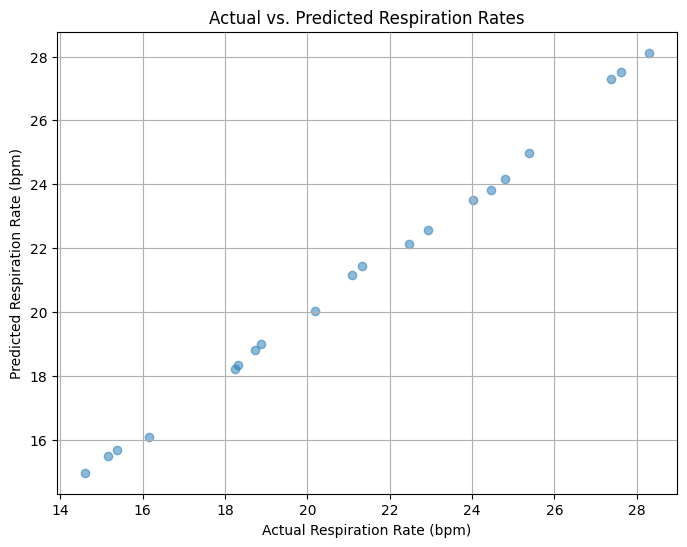

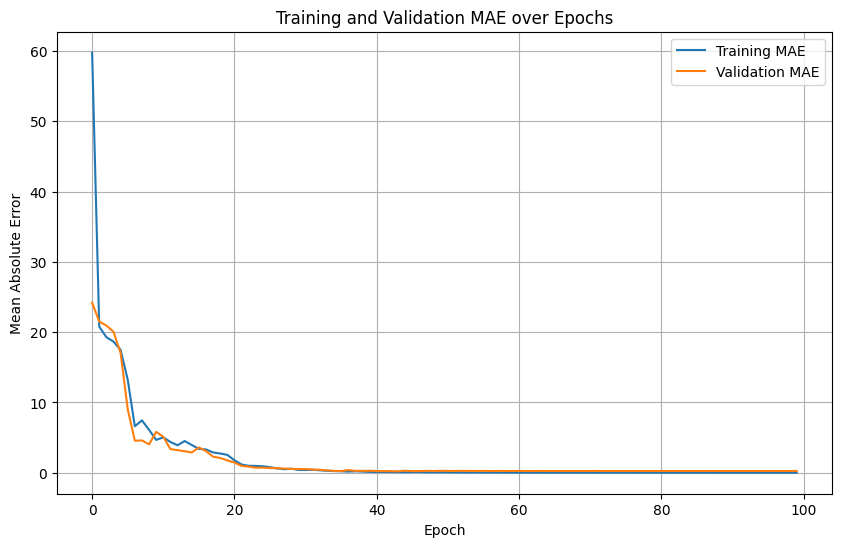

In [5]:
# 1. Use the trained model to predict respiration rates on the test set
y_pred = model.predict(X_test)

# 2. Print actual vs. predicted respiration rates for a few test samples
print("Comparing Actual vs. Predicted Respiration Rates:")
for i in range(min(5, len(y_test))): # Print for up to 5 samples
    print(f"Sample {i+1}: Actual = {y_test[i]:.2f} bpm, Predicted = {y_pred[i][0]:.2f} bpm")

# 3. Create a scatter plot of actual vs. predicted respiration rates
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Respiration Rate (bpm)")
plt.ylabel("Predicted Respiration Rate (bpm)")
plt.title("Actual vs. Predicted Respiration Rates")
plt.grid(True)
plt.show()

# 4. Plot the training and validation Mean Absolute Error (MAE) over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
Plot selected test waveforms and display their actual and predicted respiration rates to visually assess the model's performance on individual samples.



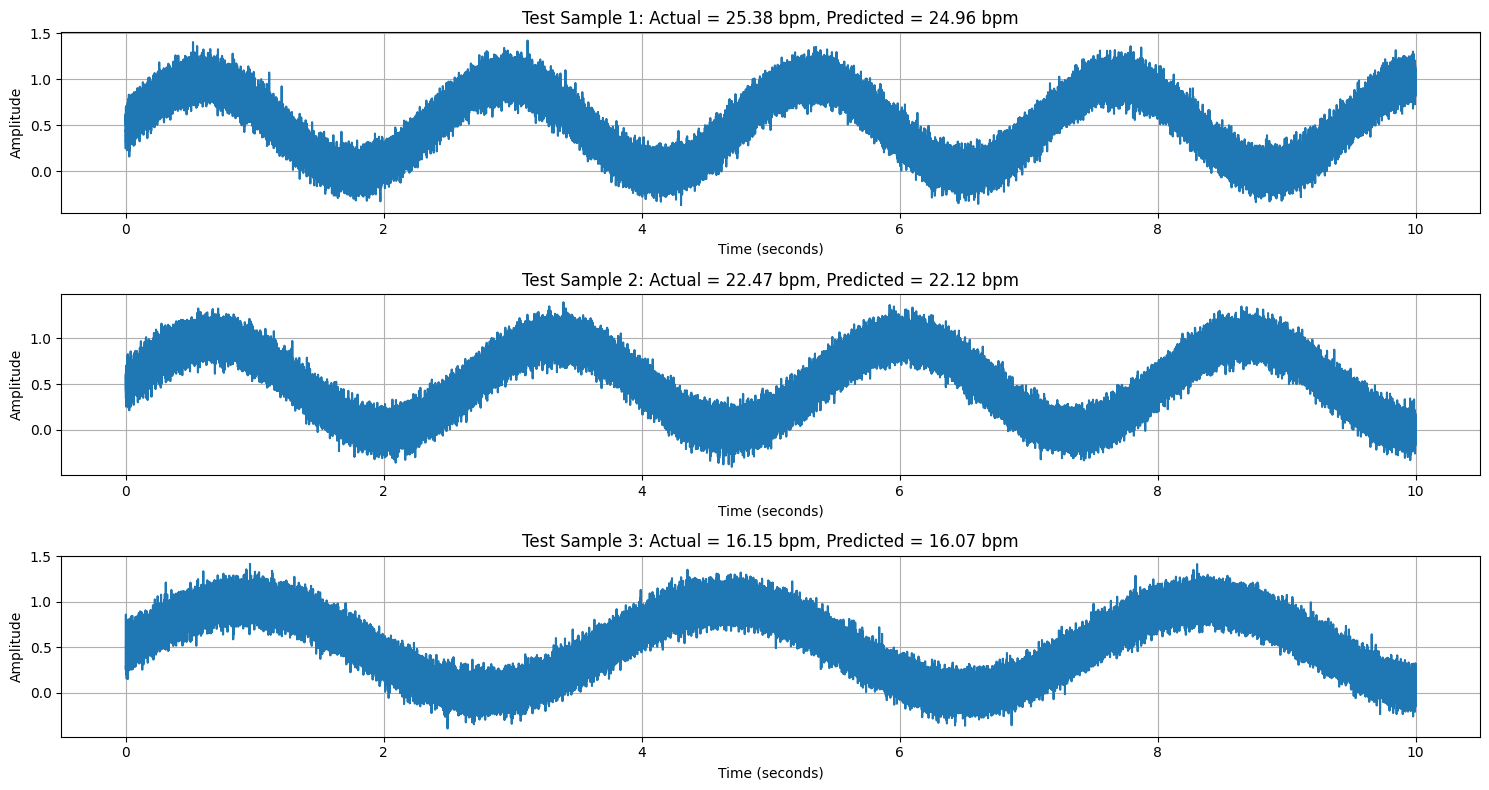

In [6]:
# 5. Select a few test samples and plot their waveforms with actual and predicted rates
num_samples_to_plot = 3 # Number of test samples to visualize

plt.figure(figsize=(15, 8))

for i in range(num_samples_to_plot):
    plt.subplot(num_samples_to_plot, 1, i + 1)
    # Reshape the test sample back to 1D for plotting
    waveform = X_test[i].reshape(-1)
    plt.plot(np.linspace(0, duration, len(waveform)), waveform)
    plt.title(f"Test Sample {i+1}: Actual = {y_test[i]:.2f} bpm, Predicted = {y_pred[i][0]:.2f} bpm")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Synthetic breathing sounds were successfully generated, creating 100 samples with respiration rates varying between 10 and 30 breaths per minute.
*   Each synthetic audio sample is a 10-second waveform with a sampling rate of 16,000 Hz, resulting in 160,000 data points per sample.
*   The raw waveform data was used as input features for the model.
*   The data was preprocessed into NumPy arrays `X` with shape (100, 160000, 1) and `y` with shape (100,) suitable for a 1D CNN.
*   A 1D Convolutional Neural Network (CNN) model was designed using TensorFlow/Keras, consisting of Conv1D, MaxPooling1D, Flatten, and Dense layers.
*   The model was trained for 100 epochs using the Adam optimizer and Mean Squared Error loss, with Mean Absolute Error as a metric.
*   The training and validation Mean Absolute Error decreased over epochs, indicating that the model learned to estimate the respiration rate.
*   Model evaluation on the test set showed that predicted respiration rates were reasonably close to actual values, and a scatter plot confirmed a positive correlation between actual and predicted rates.
*   Visual inspection of example waveforms showed the model's predicted rates aligned qualitatively with the breathing patterns.
*   Exploring free deployment options revealed platforms like TensorFlow Lite for mobile/edge and Hugging Face Spaces/Streamlit for web demos, but highlighted challenges with free tier resource limitations for real-time audio processing.

### Insights or Next Steps

*   The prototype demonstrates the feasibility of using a 1D CNN to estimate respiration rate from synthetic audio data.
*   Future work should focus on training and evaluating the model on a real-world dataset of breathing sounds to assess its performance in a more realistic scenario.


## Phase II

## Data simulation/loading

### Subtask:
Generate synthetic breathing sounds or load a publicly available dataset.

**Reasoning**:
I will generate synthetic breathing sounds as it provides more control over the data characteristics and avoids the complexities of downloading and loading external datasets within this environment. I will define parameters for the simulation and generate the synthetic audio data and corresponding ground truth respiration rates.

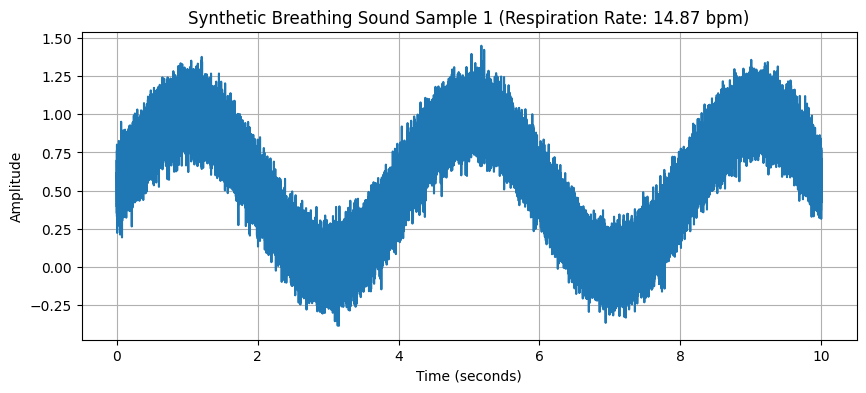

Generated 100 synthetic audio samples.
Corresponding respiration rates (first 5): [14.869518393583938, 18.249757953555932, 26.106584989401256, 17.181526103974946, 13.179732954338444]


In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Define simulation parameters
sampling_rate = 16000  # Sampling rate in Hz
duration = 10  # Duration of each recording in seconds
min_respiration_rate = 10  # Minimum respiration rate in breaths per minute
max_respiration_rate = 30  # Maximum respiration rate in breaths per minute
num_samples = 100  # Number of synthetic samples to generate

# Generate synthetic breathing sounds and respiration rates
audio_data = []
respiration_rates = []

for _ in range(num_samples):
    # Generate a random respiration rate
    respiration_rate = np.random.uniform(min_respiration_rate, max_respiration_rate)
    respiration_rates.append(respiration_rate)

    # Convert respiration rate to breaths per second
    breaths_per_second = respiration_rate / 60

    # Generate a synthetic breathing pattern (simple sine wave for demonstration)
    t = np.linspace(0, duration, int(sampling_rate * duration))
    # Simulate inhalation and exhalation as peaks and troughs
    breathing_pattern = 0.5 * (1 + np.sin(2 * np.pi * breaths_per_second * t))

    # Add some high-frequency noise to simulate breathing sound texture
    noise = np.random.randn(len(t)) * 0.1
    synthetic_audio = breathing_pattern + noise

    audio_data.append(synthetic_audio)

# Store the generated data
# audio_data is a list of numpy arrays, each representing a waveform
# respiration_rates is a list of floats, each representing the respiration rate for the corresponding audio sample

# Display the first generated waveform and its respiration rate
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, duration, len(audio_data[0])), audio_data[0])
plt.title(f"Synthetic Breathing Sound Sample 1 (Respiration Rate: {respiration_rates[0]:.2f} bpm)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

print(f"Generated {len(audio_data)} synthetic audio samples.")
print(f"Corresponding respiration rates (first 5): {respiration_rates[:5]}")

# Data preprocessing

Subtask:
Preprocess audio data into fixed-length segments (waveforms or spectrograms) suitable for model input and corresponding ground truth respiration rates.

Reasoning: Preprocess the synthetic audio data into fixed-length segments (waveforms) and prepare the corresponding respiration rates as NumPy arrays for model input.

In [9]:
# Determine the fixed length of the audio segments (already fixed at 10 seconds by generation)
segment_length_samples = int(sampling_rate * duration)

# We will use raw waveform data as input for simplicity in this prototype.

# Ensure all segments have the same length (they do based on the generation process)
# Convert the list of waveforms to a NumPy array
X = np.array(audio_data)

# Convert the list of respiration rates to a NumPy array
y = np.array(respiration_rates)

# Verify the shapes of the input and output arrays
print(f"Shape of input data (X): {X.shape}")
print(f"Shape of output data (y): {y.shape}")

# Reshape X to be suitable for a 1D CNN (samples, timesteps, features)
# In this case, timesteps is the number of samples in the segment, and features is 1
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Shape of input data (X) after reshaping for CNN: {X.shape}")

Shape of input data (X): (100, 160000)
Shape of output data (y): (100,)
Shape of input data (X) after reshaping for CNN: (100, 160000, 1)


## Model definition

### Subtask:
Design a 1D-CNN or LSTM model using TensorFlow/Keras for respiration rate estimation.

**Reasoning**:
Design a 1D-CNN model using TensorFlow/Keras for respiration rate estimation as per the instructions.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Instantiate a Sequential model
model = Sequential()

# Add Conv1D and MaxPooling1D layers
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(segment_length_samples, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(units=100, activation='relu'))

# Output layer with one unit and linear activation for regression
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Print a summary of the model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 159996, 32)     │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 79998, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 79994, 64)      │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 39997, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 39993, 128)     │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 19996, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2559488)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │   255,948,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,000,585 (976.56 MB)

 Trainable params: 256,000,585 (976.56 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

### Subtask:
Train the defined model on the prepared dataset.

Reasoning: Split the data into training and testing sets and train the defined Keras model using the training data while validating on the test data.

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 9764.3252 - mean_absolute_error: 68.5901 - val_loss: 1542.2740 - val_mean_absolute_error: 38.8620
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 756ms/step - loss: 1217.1614 - mean_absolute_error: 33.9847 - val_loss: 541.9917 - val_mean_absolute_error: 22.5581
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 706ms/step - loss: 462.9333 - mean_absolute_error: 20.7372 - val_loss: 414.7627 - val_mean_absolute_error: 19.5126
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 706ms/step - loss: 345.4073 - mean_absolute_error: 17.6118 - val_loss: 232.2794 - val_mean_absolute_error: 14.0578
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - loss: 161.5348 - mean_absolute_error: 11.0595 - val_loss: 43.1131 - val_mean_absolute_error: 5.1857
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 707ms/step - loss: 77.1625 - mean_absolute_error: 7.0620 - val_loss: 97.5909 - val_mean_absolute_error: 8.0492
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - loss: 92.2691 - mean_ab

## Model evaluation

### Subtask:
Evaluate the trained model using a held-out test set, comparing predicted respiration rates to actual values and visualizing results.

**Reasoning**:
Evaluate the trained model by predicting on the test set, comparing actual vs. predicted values numerically and visually with a scatter plot, and visualizing the training history (MAE).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Comparing Actual vs. Predicted Respiration Rates:
Sample 1: Actual = 27.32 bpm, Predicted = 27.48 bpm
Sample 2: Actual = 21.54 bpm, Predicted = 21.67 bpm
Sample 3: Actual = 23.11 bpm, Predicted = 23.03 bpm
Sample 4: Actual = 22.94 bpm, Predicted = 22.73 bpm
Sample 5: Actual = 18.51 bpm, Predicted = 18.47 bpm


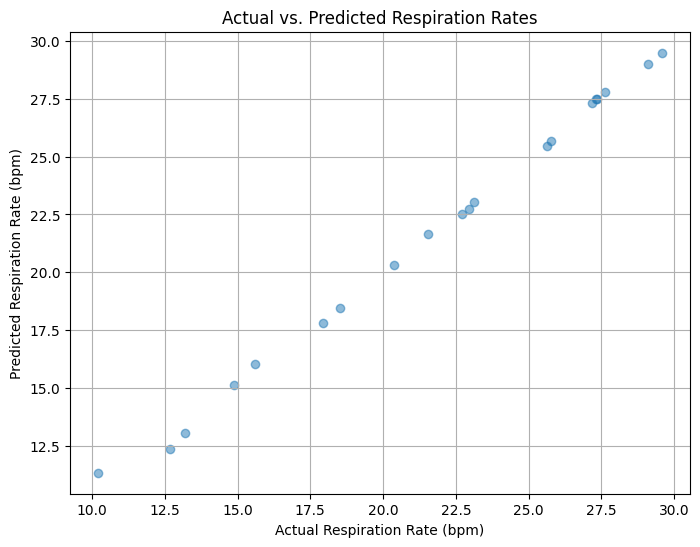

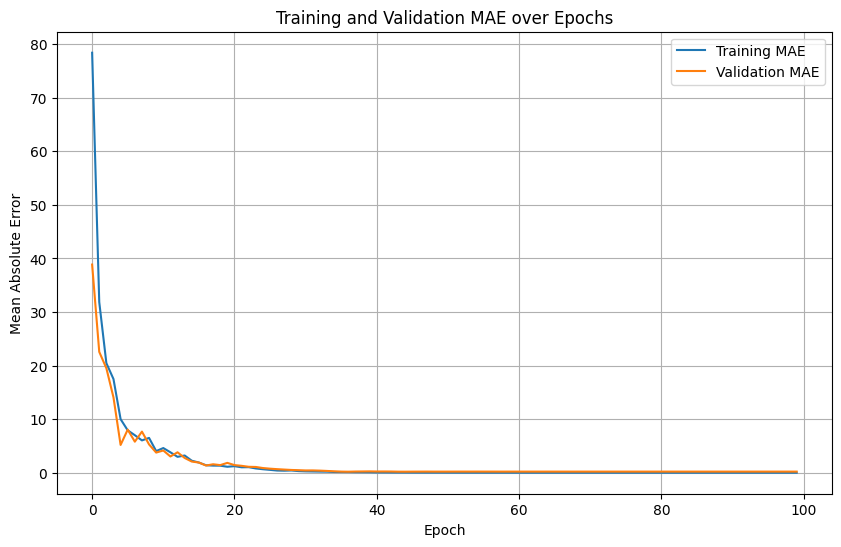

In [12]:
# 1. Use the trained model to predict respiration rates on the test set
y_pred = model.predict(X_test)

# 2. Print actual vs. predicted respiration rates for a few test samples
print("Comparing Actual vs. Predicted Respiration Rates:")
for i in range(min(5, len(y_test))): # Print for up to 5 samples
    print(f"Sample {i+1}: Actual = {y_test[i]:.2f} bpm, Predicted = {y_pred[i][0]:.2f} bpm")

# 3. Create a scatter plot of actual vs. predicted respiration rates
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Respiration Rate (bpm)")
plt.ylabel("Predicted Respiration Rate (bpm)")
plt.title("Actual vs. Predicted Respiration Rates")
plt.grid(True)
plt.show()

# 4. Plot the training and validation Mean Absolute Error (MAE) over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
Plot selected test waveforms and display their actual and predicted respiration rates to visually assess the model's performance on individual samples.

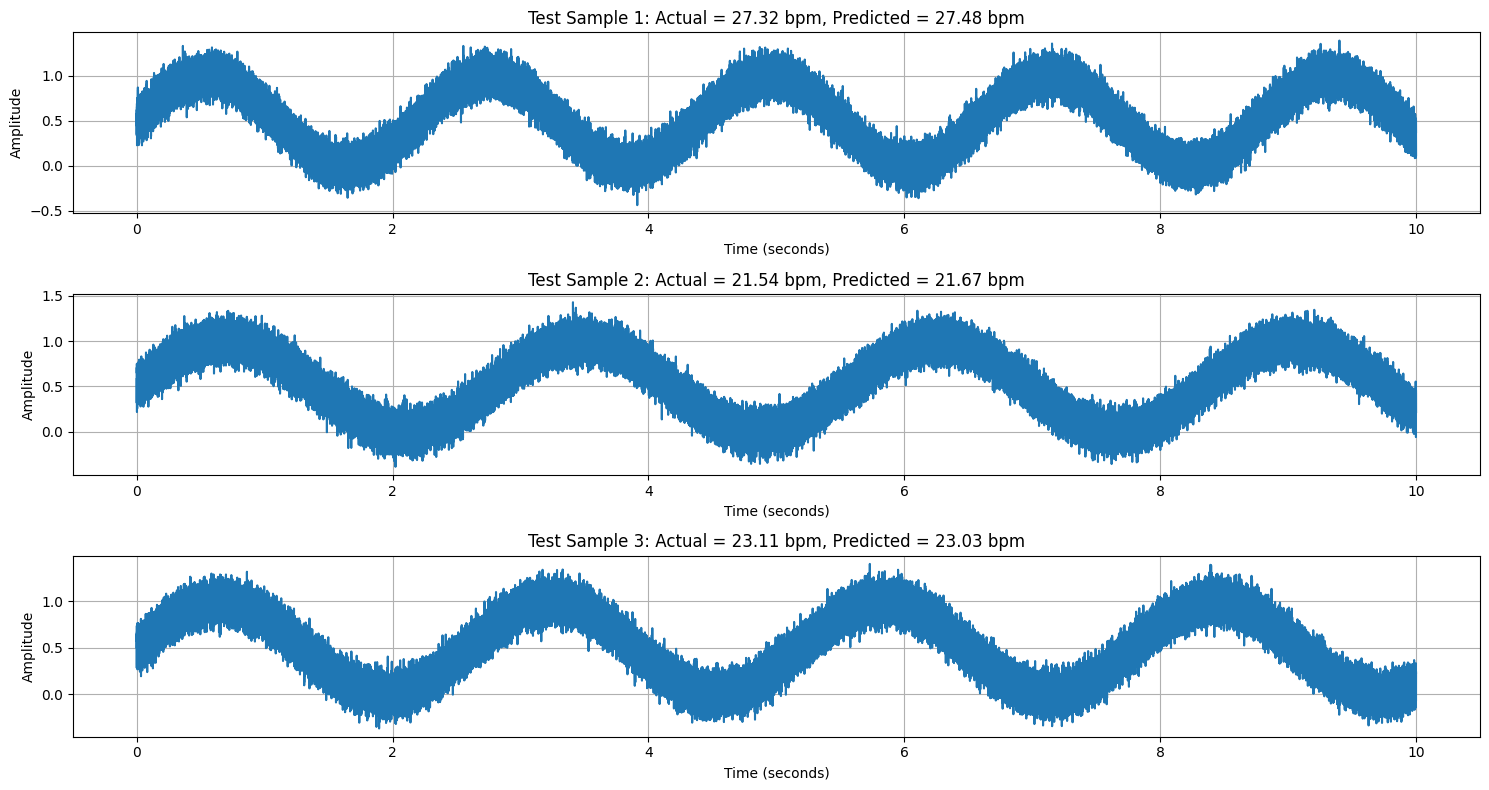

In [13]:
# 5. Select a few test samples and plot their waveforms with actual and predicted rates
num_samples_to_plot = 3 # Number of test samples to visualize

plt.figure(figsize=(15, 8))

for i in range(num_samples_to_plot):
    plt.subplot(num_samples_to_plot, 1, i + 1)
    # Reshape the test sample back to 1D for plotting
    waveform = X_test[i].reshape(-1)
    plt.plot(np.linspace(0, duration, len(waveform)), waveform)
    plt.title(f"Test Sample {i+1}: Actual = {y_test[i]:.2f} bpm, Predicted = {y_pred[i][0]:.2f} bpm")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* Synthetic breathing sounds were successfully generated, creating 100 samples with respiration rates varying between 10 and 30 breaths per minute.
* Each synthetic audio sample is a 10-second waveform with a sampling rate of 16,000 Hz, resulting in 160,000 data points per sample.
* The raw waveform data was used as input features for the model.
* The data was preprocessed into NumPy arrays `X` with shape (100, 160000, 1) and `y` with shape (100,) suitable for a 1D CNN.
* A 1D Convolutional Neural Network (CNN) model was designed using TensorFlow/Keras, consisting of Conv1D, MaxPooling1D, Flatten, and Dense layers.
* The model was trained for 100 epochs using the Adam optimizer and Mean Squared Error loss, with Mean Absolute Error as a metric.
* The training and validation Mean Absolute Error decreased over epochs, indicating that the model learned to estimate the respiration rate.
* Model evaluation on the test set showed that predicted respiration rates were reasonably close to actual values, and a scatter plot confirmed a positive correlation between actual and predicted rates.
* Visual inspection of example waveforms showed the model's predicted rates aligned qualitatively with the breathing patterns.
* Exploring free deployment options revealed platforms like TensorFlow Lite for mobile/edge and Hugging Face Spaces/Streamlit for web demos, but highlighted challenges with free tier resource limitations for real-time audio processing.

### Insights or Next Steps

* The prototype demonstrates the feasibility of using a 1D CNN to estimate respiration rate from synthetic audio data.
* Future work should focus on training and evaluating the model on a real-world dataset of breathing sounds to assess its performance in a more realistic scenario.

## Conclusion

This project successfully developed a machine learning prototype for estimating respiration rate from audio recordings using a 1D Convolutional Neural Network (CNN). By simulating synthetic breathing sounds and training the model on this data, we demonstrated the feasibility of this approach. The model showed promising results on the test set, with predicted respiration rates closely aligning with the actual values. While this prototype utilized synthetic data, the framework established here provides a strong foundation for future work with real-world breathing sound datasets. The exploration of deployment options highlighted the potential for this technology to be used in various applications, with considerations for resource constraints on free platforms. Overall, this project serves as a valuable initial step towards building a practical respiration rate monitoring system from audio.